In [2]:
# Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = './raw_sales.csv'

df = pd.read_csv(path)
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
raw = pd.read_csv(path, parse_dates=['datesold'])
# parse_dates = ['datesold'] : 지정된 열을 날짜/시간 형식으로 자동 변환
# 변환된 'datesold' datetime 형식으로 변환됨

df = raw.copy()

df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [8]:
# 연도만 추출

df['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [9]:
df['datesold'].dt.year

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
29575    2019
29576    2019
29577    2019
29578    2019
29579    2019
Name: datesold, Length: 29580, dtype: int32

In [10]:
df['year'] = df['datesold'].dt.year

df.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [11]:
# 연도별 평균가격
df.groupby('year')['price'].agg('mean')

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [13]:
round(df.groupby('year')['price'].agg('mean'),1)

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

In [14]:
result = round(df.groupby('year')['price'].agg('mean'),1)
result[:5]

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
Name: price, dtype: float64

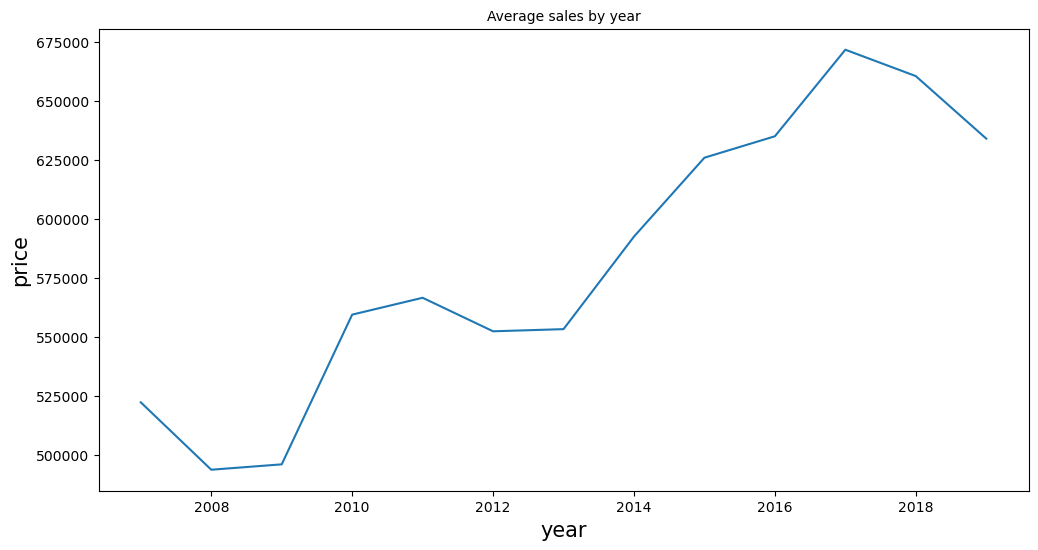

In [19]:
# 시간의 변동에 따른 추세를 보고싶다
# 선 그래프
fig, ax = plt.subplots(figsize=(12,6)) # 도화지

ax.plot(result.index,result.values) # plot(x, y)

ax.set_title('Average sales by year', size = 10)
ax.set_xlabel('year', size = 15)
ax.set_ylabel('price', size = 15)

plt.savefig('./Average_sales_by_year.png')
plt.show()

In [20]:
# 막대그래프
df.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [22]:
# 월별 막대그래프를 x축 기준
# 2007년, 2008년도 병립

df['year'] = df['datesold'].dt.year

In [23]:
df['datesold'].dt.month

0        2
1        2
2        3
3        3
4        3
        ..
29575    7
29576    7
29577    7
29578    7
29579    7
Name: datesold, Length: 29580, dtype: int32

In [24]:
df['month'] = df['datesold'].dt.month

In [25]:
df.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [26]:
df['year'].isin([2007,2008,2009])

0         True
1         True
2         True
3         True
4         True
         ...  
29575    False
29576    False
29577    False
29578    False
29579    False
Name: year, Length: 29580, dtype: bool

In [28]:
condition = df['year'].isin([2007,2008,2009])

df.loc[condition,:]

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12


In [29]:
df_condition = df.loc[condition,:]

df_condition.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12
24806,2009-12-24,2617,367000,unit,2,2009,12


In [40]:
# 연도별, 월별 평균 가격을 알고 싶어요
round(df_condition.groupby(['year','month'])['price'].agg('mean'),1)

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
      7        592078.9
      8        505608.7
      9        556875.0
      10       498600.0
      11       505442.3
      12       505737.0
2008  1        504428.6
      2        531080.0
      3        563500.0
      4        534204.5
      5        522394.7
      6        539092.6
      7        537453.1
      8        449510.4
      9        496778.7
      10       454822.0
      11       489546.3
      12       494410.8
2009  1        482238.6
      2        459281.6
      3        493931.2
      4        497882.6
      5        477808.7
      6        479053.2
      7        495982.1
      8        485465.9
      9        499597.2
      10       501456.3
      11       546882.3
      12       524921.4
Name: price, dtype: float64

In [41]:
result = round(df_condition.groupby(['year','month'])['price'].agg('mean'),1)

result.head()

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
Name: price, dtype: float64

In [42]:
result.index

MultiIndex([(2007,  2),
            (2007,  3),
            (2007,  4),
            (2007,  5),
            (2007,  6),
            (2007,  7),
            (2007,  8),
            (2007,  9),
            (2007, 10),
            (2007, 11),
            (2007, 12),
            (2008,  1),
            (2008,  2),
            (2008,  3),
            (2008,  4),
            (2008,  5),
            (2008,  6),
            (2008,  7),
            (2008,  8),
            (2008,  9),
            (2008, 10),
            (2008, 11),
            (2008, 12),
            (2009,  1),
            (2009,  2),
            (2009,  3),
            (2009,  4),
            (2009,  5),
            (2009,  6),
            (2009,  7),
            (2009,  8),
            (2009,  9),
            (2009, 10),
            (2009, 11),
            (2009, 12)],
           names=['year', 'month'])

In [43]:
result.reset_index().iloc[::3,:]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3
24,2009,2,459281.6
27,2009,5,477808.7


In [35]:
result

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
                 ...   
2019  3        651666.7
      4        655325.6
      5        641491.1
      6        703275.4
      7        583192.1
Name: price, Length: 150, dtype: float64

In [45]:
result = result.reset_index()

In [46]:
result.head()

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3


In [47]:
result['year'].unique()

array([2007, 2008, 2009])

In [49]:
result.loc[result['year'] == 2007, :]

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [50]:
result_2007 = result.loc[result['year'] == 2007, :]
result_2008 = result.loc[result['year'] == 2008, :]
result_2009 = result.loc[result['year'] == 2009, :]



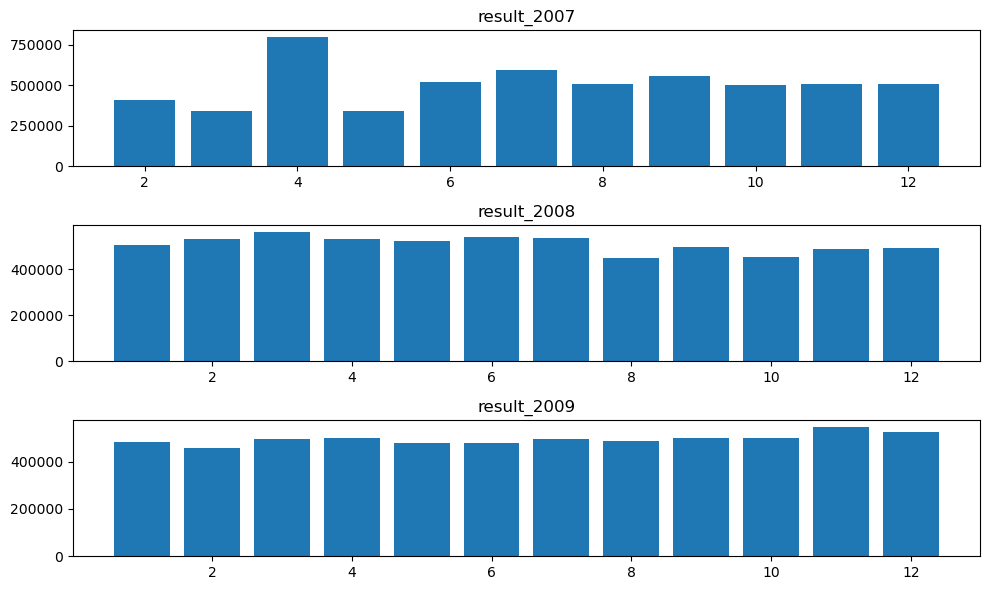

In [59]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,6))

ax[0].bar(result_2007['month'],result_2007['price'])
ax[0].set_title('result_2007')

ax[1].bar(result_2008['month'],result_2008['price'])
ax[1].set_title('result_2008')

ax[2].bar(result_2009['month'],result_2009['price'])
ax[2].set_title('result_2009')

plt.tight_layout()

plt.show()